# Install Dependencies

In [1]:
!pip3 install -q pandas pymongo geopy dnspython plotly==4.14.3 folium

You should consider upgrading via the '/home/ashesh/Dropbox/Coursework/cs581/project/venv/bin/python3 -m pip install --upgrade pip' command.


# Import Libraries

In [31]:
import os
import random
import pprint
import pandas as pd
import datetime as dt
import multiprocessing as mp

import csv

import json

from enum import Enum

import pymongo
from pymongo import MongoClient

from geopy import distance
from collections import defaultdict

from datetime import datetime, timedelta

import plotly.express as px

import folium
from folium.plugins import MarkerCluster

# Define Constants

In [32]:
# https://nominatim.openstreetmap.org/search.php?q=LaGuardia+Airport&polygon_geojson=1&format=json
POLYGON    = [[[-73.8892502,40.773079],[-73.8892394,40.773015],[-73.8891979,40.7729988],[-73.8891845,40.7729307],[-73.8892193,40.7729094],[-73.8892059,40.7728424],[-73.8891697,40.7728282],[-73.8891576,40.7727601],[-73.8891885,40.7727439],[-73.8891778,40.7726758],[-73.8891362,40.7726575],[-73.8891241,40.7725976],[-73.8891563,40.7725783],[-73.8891482,40.7725103],[-73.8891053,40.772494],[-73.8890919,40.772429],[-73.8891281,40.7724067],[-73.8891147,40.7723407],[-73.8890745,40.7723275],[-73.8890559,40.7722744],[-73.8890844,40.772245],[-73.8890701,40.7721909],[-73.889026,40.772181],[-73.8890143,40.7721271],[-73.8890494,40.7721004],[-73.8890312,40.7720394],[-73.8889922,40.7720177],[-73.8889793,40.7719689],[-73.8890089,40.7719401],[-73.8890004,40.7718756],[-73.8889621,40.7718628],[-73.8889536,40.7717951],[-73.8889767,40.7717744],[-73.8889547,40.7717007],[-73.8890019,40.7716787],[-73.8890019,40.7716262],[-73.8889192,40.7715686],[-73.888908,40.7715415],[-73.8889639,40.7714822],[-73.8889572,40.7714483],[-73.8889169,40.7714365],[-73.8888924,40.7713716],[-73.8889248,40.771348],[-73.8889145,40.7712871],[-73.8888387,40.7712535],[-73.888832,40.7712231],[-73.8888923,40.771179],[-73.8888824,40.7711184],[-73.8887982,40.7710841],[-73.8887918,40.7710228],[-73.8888306,40.7710031],[-73.8888177,40.7709418],[-73.8887691,40.7709148],[-73.8887571,40.7708634],[-73.8887951,40.7708376],[-73.8887811,40.7707468],[-73.8887331,40.7707241],[-73.8887271,40.7706635],[-73.8887571,40.7706362],[-73.8887451,40.7705757],[-73.8887031,40.770553],[-73.8886891,40.7704924],[-73.8887191,40.7704591],[-73.8887051,40.7703985],[-73.8886691,40.7703834],[-73.8886571,40.7703153],[-73.8886831,40.7703032],[-73.8886692,40.7702336],[-73.8886671,40.7702229],[-73.8886331,40.7702123],[-73.8886171,40.7701411],[-73.8886531,40.7701169],[-73.8886411,40.7700503],[-73.8885932,40.7700367],[-73.8885912,40.7699776],[-73.8886211,40.7699534],[-73.8886052,40.7698853],[-73.8886311,40.7698626],[-73.8886191,40.7697944],[-73.8886591,40.7697672],[-73.8886371,40.769699],[-73.8886032,40.7696915],[-73.8885892,40.7696309],[-73.8885492,40.7696082],[-73.8885432,40.7695476],[-73.8885992,40.7694992],[-73.8885912,40.7694416],[-73.8885432,40.7694189],[-73.8885352,40.7693478],[-73.8885712,40.7693266],[-73.8885532,40.769263],[-73.8885112,40.7692509],[-73.8884992,40.7691888],[-73.8885272,40.7691646],[-73.8885143,40.7690925],[-73.888479,40.7690757],[-73.8884463,40.7690242],[-73.8883549,40.7689985],[-73.8883262,40.7689698],[-73.8882465,40.7689579],[-73.8882138,40.7689817],[-73.8881394,40.7689392],[-73.888142,40.7689085],[-73.8880714,40.768865],[-73.8880728,40.7688007],[-73.8880362,40.7687819],[-73.888031,40.7687146],[-73.8879706,40.7686779],[-73.8878644,40.7683365],[-73.8878587,40.7683016],[-73.887861,40.7682882],[-73.8878886,40.7682635],[-73.8878781,40.7682061],[-73.8878376,40.7681843],[-73.8878128,40.7681111],[-73.8878442,40.7680874],[-73.8878285,40.7680241],[-73.8877841,40.7680092],[-73.8877671,40.7679439],[-73.8877984,40.7679222],[-73.8877802,40.7678539],[-73.8877411,40.7678431],[-73.8877201,40.7677748],[-73.8877462,40.767754],[-73.8877266,40.7676887],[-73.8876874,40.7676709],[-73.8876678,40.7676125],[-73.8876952,40.7675828],[-73.8876199,40.7673383],[-73.8867634,40.7675318],[-73.8864074,40.7675927],[-73.8858735,40.7676587],[-73.885396,40.7677441],[-73.8851569,40.7678093],[-73.8848707,40.767912],[-73.8845381,40.7680299],[-73.8842553,40.7681341],[-73.8838861,40.7682737],[-73.8834332,40.7684583],[-73.8830257,40.7686478],[-73.8825726,40.7688637],[-73.8822739,40.7690146],[-73.8813228,40.7695394],[-73.8804907,40.7700335],[-73.8794145,40.7705643],[-73.8788763,40.770829],[-73.878515,40.7709944],[-73.8780816,40.7711413],[-73.8778857,40.7712079],[-73.8774403,40.7713739],[-73.8769428,40.7715191],[-73.8763397,40.7716629],[-73.8755877,40.7717751],[-73.8749701,40.771862],[-73.8743087,40.7719231],[-73.8738635,40.771946],[-73.8733999,40.7719474],[-73.8729633,40.7719329],[-73.8725634,40.7719058],[-73.8722418,40.7718787],[-73.8720015,40.7718513],[-73.8716812,40.771795],[-73.8713558,40.7717327],[-73.8710318,40.771663],[-73.8706402,40.7715609],[-73.8703954,40.7714843],[-73.8701345,40.7713994],[-73.8697847,40.7712697],[-73.8695003,40.7711534],[-73.8690476,40.7709421],[-73.8687922,40.7708088],[-73.8684659,40.7706325],[-73.868049,40.7703866],[-73.8676872,40.7701555],[-73.8672605,40.7698709],[-73.8668274,40.7695801],[-73.866539,40.7693757],[-73.8662144,40.7691315],[-73.8659219,40.7689098],[-73.8656624,40.7687087],[-73.865383,40.7684893],[-73.8649874,40.7681666],[-73.8644193,40.7676816],[-73.8638625,40.7671208],[-73.8633165,40.7665517],[-73.8631942,40.7666062],[-73.8627649,40.7667537],[-73.8626152,40.7668366],[-73.8613995,40.7669443],[-73.8608684,40.7672531],[-73.8600047,40.7670865],[-73.859479,40.7670581],[-73.8590334,40.7672268],[-73.8584877,40.7676867],[-73.8571932,40.7687633],[-73.8562936,40.7688594],[-73.8533696,40.7674055],[-73.8531228,40.7672755],[-73.8529512,40.7671293],[-73.8516101,40.7650084],[-73.8514882,40.7649635],[-73.8513893,40.7649593],[-73.8512559,40.7650556],[-73.851225,40.7651304],[-73.8512821,40.7653263],[-73.8514283,40.7656091],[-73.8523953,40.7670718],[-73.8528416,40.7676182],[-73.8561093,40.7691694],[-73.8568676,40.7695359],[-73.8574852,40.7698474],[-73.857656,40.7699927],[-73.857604,40.7700848],[-73.8576462,40.7701276],[-73.8578303,40.7701977],[-73.8579405,40.7701778],[-73.8580774,40.7701999],[-73.8581296,40.7703536],[-73.858002,40.7704024],[-73.8579306,40.7704814],[-73.8578992,40.7705258],[-73.8579595,40.7706005],[-73.8579548,40.7706568],[-73.8578325,40.7707786],[-73.8577432,40.7707633],[-73.8575238,40.770651],[-73.8569307,40.7703447],[-73.8568188,40.7702738],[-73.8567528,40.7702677],[-73.8566463,40.7702406],[-73.8565515,40.770252],[-73.8563916,40.7703473],[-73.8558628,40.7709637],[-73.8557587,40.771118],[-73.855543,40.7713774],[-73.8552301,40.7716756],[-73.8549906,40.7719336],[-73.8549717,40.7720922],[-73.8549936,40.7721727],[-73.8550775,40.7722626],[-73.8552102,40.7723487],[-73.85552,40.7725094],[-73.8559383,40.7727155],[-73.856225,40.7728543],[-73.8563117,40.7729096],[-73.8563887,40.7729188],[-73.856518,40.7729818],[-73.8567131,40.7730016],[-73.8569737,40.7731036],[-73.8570572,40.7731737],[-73.8571606,40.7732286],[-73.8572239,40.7732941],[-73.8573651,40.7733487],[-73.8575606,40.7734713],[-73.8576685,40.7735006],[-73.8579742,40.7736446],[-73.8582126,40.7737461],[-73.8587849,40.7740162],[-73.8588605,40.774076],[-73.8590356,40.7741435],[-73.8591062,40.7741916],[-73.8591721,40.7742058],[-73.8593353,40.7742922],[-73.8594569,40.7743258],[-73.8595533,40.7743934],[-73.8595981,40.7743901],[-73.8596505,40.7744315],[-73.8597992,40.774503],[-73.8598541,40.7745051],[-73.8600666,40.7746298],[-73.8602461,40.774669],[-73.8603476,40.7747261],[-73.8605808,40.7747935],[-73.8608775,40.774941],[-73.8610019,40.7750348],[-73.861271,40.7751954],[-73.8615743,40.775322],[-73.8619568,40.7755282],[-73.8624528,40.775764],[-73.8626497,40.7758386],[-73.8629879,40.7760454],[-73.8631577,40.7761046],[-73.8633781,40.7762137],[-73.8634794,40.7763015],[-73.8638821,40.7764943],[-73.8641316,40.7765504],[-73.8648509,40.776946],[-73.8652355,40.7771796],[-73.8653554,40.7771313],[-73.8655545,40.777243],[-73.866063,40.7774909],[-73.8661057,40.7775617],[-73.8662612,40.77764],[-73.8664223,40.7776573],[-73.8671953,40.7780473],[-73.8674556,40.7781606],[-73.8679336,40.7783944],[-73.8684454,40.7785576],[-73.8690399,40.7788882],[-73.8696573,40.7792073],[-73.8700552,40.7793934],[-73.8701659,40.7795085],[-73.8702344,40.7795861],[-73.8704283,40.7796631],[-73.8705029,40.7796566],[-73.8712605,40.7800611],[-73.8721508,40.7805063],[-73.8722822,40.7806586],[-73.8725505,40.7808211],[-73.8723259,40.7810928],[-73.8723005,40.7811235],[-73.8715057,40.7820851],[-73.8714508,40.7821349],[-73.8713636,40.7821603],[-73.8704641,40.7823259],[-73.8694065,40.7835977],[-73.8694102,40.7836145],[-73.8694158,40.7836327],[-73.8698689,40.7850805],[-73.8693499,40.7857091],[-73.8693633,40.7857175],[-73.8694082,40.7857387],[-73.8708975,40.7864458],[-73.8748226,40.7816841],[-73.8751361,40.7815015],[-73.8788889,40.7832824],[-73.8798437,40.7821431],[-73.8790213,40.7817442],[-73.8787062,40.7806086],[-73.8788055,40.7806162],[-73.8788726,40.7806557],[-73.8789776,40.7806563],[-73.8790536,40.7806295],[-73.8791379,40.7806541],[-73.879203,40.7807032],[-73.879217,40.7807967],[-73.8793038,40.7807928],[-73.879297,40.7807499],[-73.8793741,40.7807252],[-73.879448,40.7807275],[-73.8794583,40.7809249],[-73.8796016,40.7809298],[-73.879598,40.7807265],[-73.879668,40.7806216],[-73.8798721,40.7806195],[-73.8801454,40.7805708],[-73.8807695,40.7804956],[-73.8809255,40.7805335],[-73.8811878,40.7805681],[-73.8814923,40.7805372],[-73.8816576,40.7804431],[-73.8818854,40.7804665],[-73.8821358,40.7803978],[-73.882391,40.7803602],[-73.8827288,40.7802151],[-73.8828717,40.7801999],[-73.8828997,40.7802931],[-73.8832146,40.7802708],[-73.8832657,40.7801839],[-73.8833842,40.7802305],[-73.883495,40.7802421],[-73.8835755,40.7802308],[-73.8837019,40.7802573],[-73.8844308,40.7801517],[-73.8848687,40.7799817],[-73.8849514,40.7797963],[-73.8849779,40.7796304],[-73.8850107,40.7795736],[-73.8851083,40.7795258],[-73.8851182,40.7795125],[-73.8851638,40.779421],[-73.8850399,40.7793321],[-73.8850609,40.7790121],[-73.8849974,40.778899],[-73.8849843,40.778702],[-73.884997,40.7786411],[-73.885003,40.7785563],[-73.8849601,40.7785035],[-73.8848016,40.7776606],[-73.8846101,40.7769561],[-73.8844021,40.7759061],[-73.8843734,40.775665],[-73.8843385,40.7755584],[-73.8842057,40.7754467],[-73.8844243,40.7754304],[-73.8846443,40.7753927],[-73.8847696,40.7752931],[-73.8848448,40.7750981],[-73.8847616,40.7748363],[-73.8846141,40.7744524],[-73.8845363,40.7743813],[-73.8844304,40.7743285],[-73.8843353,40.7742748],[-73.884256,40.7742676],[-73.8841367,40.7742026],[-73.8840767,40.7741909],[-73.8838923,40.7741914],[-73.883877,40.7741197],[-73.8841649,40.7740917],[-73.8842665,40.7741627],[-73.8857569,40.774007],[-73.8857851,40.7740055],[-73.8876262,40.7738118],[-73.8877503,40.7737188],[-73.888918,40.7736047],[-73.8892438,40.7735728],[-73.8891858,40.773338],[-73.8892254,40.7731287],[-73.889214,40.7730953],[-73.8892502,40.773079]]]
CONNECTION = 'mongodb://localhost:27017/test'
DB         = 'yellow_taxi_test'
COLLECTION = 'rides'

# TAXI Ride Class

In [33]:
class RateCode(Enum):
  STANDARD_RATE = 1
  JFK = 2
  NEWARK = 3
  NASSAU_OR_WESTCHESTER = 4
  NEGOTIATED_FARE=5
  GROUP_RIDE=6
    
  def __repr__(self):
    return self.name
  
  def __str__(self):
    return self.name

class PaymentType(Enum):
  CREDIT_CARD = 1
  CASH = 2
  NO_CHARGE = 3
  DISPUTE = 4
  UNKNOWN = 5
  VOIDED_TRIP = 6
  
  def __repr__(self):
    return self.name
  
  def __str__(self):
    return self.name

class TaxiRide:
  def __init__(self, id, vendor_id, start_timestamp, end_timestamp, pick_location, drop_location, 
                distance, rate_code_id, is_store_and_fwd, 
                passengers, payment_type_id, fare, year):
    self.id = id
    self.vendor_id = vendor_id
    self.start_timestamp = start_timestamp
    self.end_timestamp = end_timestamp
    self.pick_location = pick_location['coordinates']
    self.drop_location = drop_location['coordinates']
    self.distance = distance
    self.rate_code_id = rate_code_id
    self.is_store_and_fwd = is_store_and_fwd
    self.passengers = passengers
    self.payment_type_id = payment_type_id
    self.fare = fare
    self.year = year
    
  def get_mergeable_rides(self, max_passengers, time_window, walkable_distance, sort_by, include_rides, exclude_rides, on_location, index):
    min_timestamp = self.start_timestamp
    max_timestamp = self.start_timestamp + dt.timedelta(minutes = time_window)
    seat_capacity = max_passengers - self.passengers
    
    rides = []
    for ride in include_rides[index:]:
      if ((min_timestamp <= ride.start_timestamp <= max_timestamp) and 
          (ride.passengers < seat_capacity)):
        if(ride.id != self.id):
          rides.append(ride)
      else:
        break
    
    projection = { '_id': 1 }
    query = {
      '_id' : { '$in': [ride.id for ride in rides] },
      on_location : {
          '$geoWithin' : {
            '$centerSphere': [ getattr(self, on_location), walkable_distance / 3963.2 ]
          }
        }
    }
    
    if not sort_by:
      sort_by = [("fare.total", pymongo.DESCENDING)]
    
    ride_ids = []
    for ride in rides_collection.find(query, projection).sort(sort_by).limit(3):
      ride_ids.append(ride['_id'])
    
    return [x for x in rides if x.id in ride_ids]

  def __str__(self):
    return json.dumps(self.__dict__, default = str)
  
  def __repr__(self):
    return str(vars(self))
  
  def __hash__(self):
    return hash(self.id)

# Merge Algorithm (on merge candicates)

In [34]:
MERGE_PERCENT=100

merged_rides_count  = 0   # Total merged rides
saved_fare_amount   = 0   # Total Saved Amount
saved_ride_distance = 0   # Total saved distances

merged_per_day = defaultdict(int) # Dictionary of Number of merged rides per day {trip_date: trip_count}
saved_fare_per_day = defaultdict(float) # Dictionary of fare saved per day {trip_date: total_amount}
saved_distance_per_day = defaultdict(float) # Dictionary of distance saved per day {trip_date: distance_saved}
unmerged_per_day = defaultdict(int) # Dictionary of Number of unmerged rides per day {trip_date: trip_count}
drop_rides_per_day = defaultdict(list) # Dictionary of co-ordinates drop rides per day {trip_date: [ride_co-ordinates] }
pickup_rides_per_day = defaultdict(list) # Dictionary of co-ordinates pickup rides per day {trip_date: [ride_co-ordinates] }
total_per_day = defaultdict(int) # Dictionary of Number of rides per day {trip_date: trip_count}

def merge_ride(merg_rides, on_location):      

    global merged_rides_count
    global saved_fare_amount
    global saved_ride_distance
    global merged_per_day
    global saved_fare_per_day
    global saved_distance_per_day
    global unmerged_per_day
    global drop_rides_per_day
    global pickup_rides_per_day
    global total_per_day
    
    
    
    total_rides = len(merg_rides) #total number of rides
    print(f'Total rides: {total_rides}')
    rides_considered=0
    visited_rides=set()

    for ride,neighbors in merg_rides.items():

        trip_date = ride.start_timestamp.date()
        total_per_day[trip_date]+=1

        if rides_considered > (total_rides * MERGE_PERCENT):
                break
        
        if ride not in visited_rides:
            neighbor = None
            for n in neighbors:
                if n not in visited_rides:
                    neighbor = n
                    break
            
            if neighbor:
                visited_rides.add(ride)
                visited_rides.add(neighbor)
                rides_considered+=2
            
                # Record data for visualization
                merged_rides_count += 1
                """
                Current ride passenger will wait for x mins and then join the later ride.
                Savings will be total of current ride which never commenced
                """
                saved_fare_amount += ride.fare['total']
                saved_distance = ride.distance # ride.trip_distance- distance.distance(ride.drop_location, neighbor.drop_location)
                saved_ride_distance += saved_distance

                merged_per_day[trip_date] += 1
                saved_fare_per_day[trip_date] += ride.fare['total']
                saved_distance_per_day[trip_date] += saved_distance

                if on_location == 'pick_location':
                    pickup_rides_per_day[trip_date].append(ride.pick_location)
                    pickup_rides_per_day[trip_date].append(neighbor.pick_location)
                else:
                    drop_rides_per_day[trip_date].append(ride.drop_location)
                    drop_rides_per_day[trip_date].append(neighbor.drop_location)
            else:
                visited_rides.add(ride)
                unmerged_per_day[trip_date] += 1
                rides_considered+=1

                if on_location == 'pick_location':
                    pickup_rides_per_day[trip_date].append(ride.pick_location)
                else:
                    drop_rides_per_day[trip_date].append(ride.drop_location)


# Connect to MongoDB

In [35]:
client = MongoClient(CONNECTION, connect = False)
client.list_database_names()

['admin', 'config', 'local', 'yellow_taxi_test']

In [36]:
db = client[DB]
rides_collection = db[COLLECTION]

# Pick: LGA, distance on drop_location

In [37]:
pick_rides = []
pick_rides_query = {
    '_id' : {'$gt': 201501000000000, '$lt': 201502000000000},
    'pick_location': {
        '$geoWithin': {
            '$geometry': { 'type': 'Polygon', 'coordinates': POLYGON }
        }
    }
}

for ride in rides_collection.find(pick_rides_query).sort('start_timestamp').limit(10000):
  pick_rides.append(TaxiRide(ride['_id'], ride['vendor_id'], 
                        ride['start_timestamp'], ride['end_timestamp'], 
                        ride['pick_location'], ride['drop_location'], 
                        ride['distance'], 
                        ride['rate_code_id'], 
                        ride['is_store_and_fwd'], 
                        ride['passengers'], 
                        ride['payment_type_id'], 
                        ride['fare'], 
                        ride['year']))

In [38]:
from_lga_mergable_rides_dict = {}

for i in range(len(pick_rides)):
  print('\r' + f'Number of rides processed: \t{i}', end='')
  ride = pick_rides[i]
  mergable_rides = ride.get_mergeable_rides(3, 5, 150, sort_by = [("fare.tips", pymongo.ASCENDING), ("distance", pymongo.ASCENDING)], include_rides = pick_rides, exclude_rides = [], on_location = "drop_location", index = i)
  if mergable_rides:
    from_lga_mergable_rides_dict[ride] = mergable_rides

Number of rides processed: 	9999

In [39]:
len(pick_rides)

10000

# Drop: LGA, distance on pick_location

In [40]:
drop_rides = []
drop_rides_query = {
    '_id' : {'$gt': 201501000000000, '$lt': 201502000000000},
    'drop_location': {
        '$geoWithin': {
            '$geometry': { 'type': 'Polygon', 'coordinates': POLYGON }
        }
    }
}

for ride in rides_collection.find(drop_rides_query).sort('start_timestamp').limit(10000):
  drop_rides.append(TaxiRide(ride['_id'], ride['vendor_id'], 
                        ride['start_timestamp'], ride['end_timestamp'], 
                        ride['pick_location'], ride['drop_location'], 
                        ride['distance'], 
                        ride['rate_code_id'], 
                        ride['is_store_and_fwd'], 
                        ride['passengers'], 
                        ride['payment_type_id'], 
                        ride['fare'], 
                        ride['year']))

In [41]:
to_lga_mergable_rides_dict = {}

for i in range(len(drop_rides)):
  print('\r' + f'Number of rides processed: \t{i}', end='')
  ride = pick_rides[i]
  mergable_rides = ride.get_mergeable_rides(3, 5, 150, sort_by = [("fare.tips", pymongo.ASCENDING), ("distance", pymongo.ASCENDING)], include_rides = drop_rides, exclude_rides = [], on_location = "pick_location", index = i)
  if mergable_rides:
    to_lga_mergable_rides_dict[ride] = mergable_rides

Number of rides processed: 	9999

In [42]:
len(drop_rides)

10000

In [43]:
merge_ride(from_lga_mergable_rides_dict, 'pickup_location')

Total rides: 3913


In [44]:
merge_ride(to_lga_mergable_rides_dict, 'drop_location')

Total rides: 7


In [45]:
files = {'merged_per_day': merged_per_day, 
         'saved_fare_per_day': saved_fare_per_day, 
         'saved_distance_per_day': saved_distance_per_day, 
            'unmerged_per_day': unmerged_per_day, 'drop_rides_per_day': drop_rides_per_day, 'pickup_rides_per_day': pickup_rides_per_day, 
            'total_per_day': total_per_day}

def write_csv(filename, mydict):
    with open(filename, 'a') as csv_file:  
        writer = csv.writer(csv_file)
        for key, value in mydict.items():
            writer.writerow([key, value])


for file in files:
    write_csv(file,files[file])

In [46]:
drop_locations = [] 

for key, values in drop_rides_per_day.items():
    drop_locations.extend(values)

drop_locations = [[y[1],y[0]] for y in drop_locations]

In [47]:
pickup_locations = [] 

for key, values in pickup_rides_per_day.items():
    pickup_locations.extend(values)

pickup_locations = [[y[1],y[0]] for y in pickup_locations]

In [48]:
# storing the result in the dataframe -- start from here

df = pd.DataFrame(list(merged_per_day.items()),columns = ['date','merged_rides'])
df['unmerged_rides'] = df['date'].map(unmerged_per_day)
df['saved_fare_per_day'] = df['date'].map(saved_fare_per_day)
df['saved_distance_per_day'] = df['date'].map(saved_distance_per_day)

In [49]:
df.head()

,date,merged_rides,unmerged_rides,saved_fare_per_day,saved_distance_per_day
0,2015-01-01,1537,62,54971.73,14502.10
1,2015-01-02,835,29,31578.13,8119.34


In [50]:
unmerged_per_day

defaultdict(int,
            {datetime.date(2015, 1, 1): 62, datetime.date(2015, 1, 2): 29})

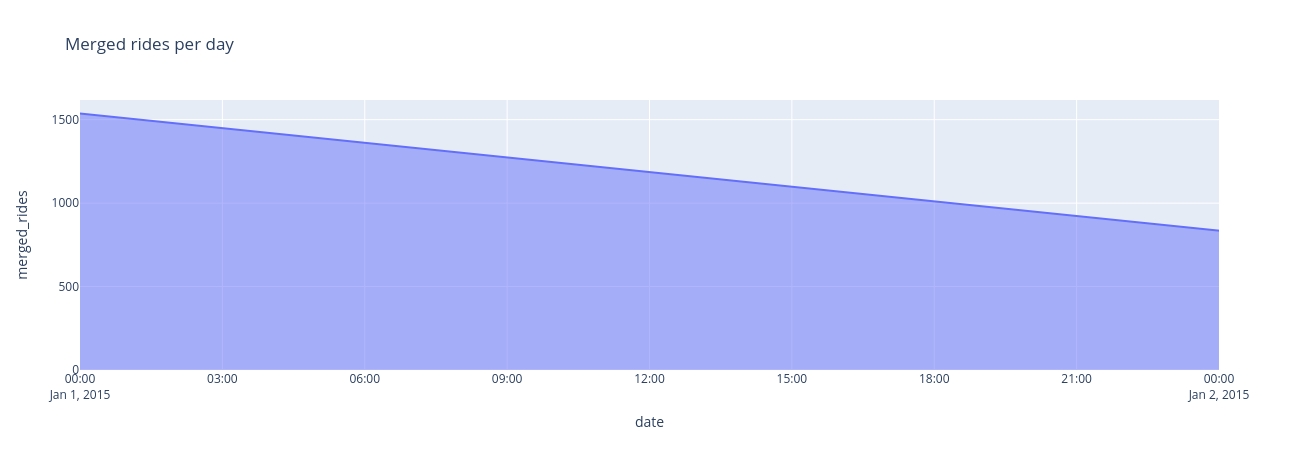

In [51]:
import plotly.express as px

#df = px.data.stocks(indexed=True)-1
fig = px.area(df, x='date', y="merged_rides", title="Merged rides per day")
fig.show()

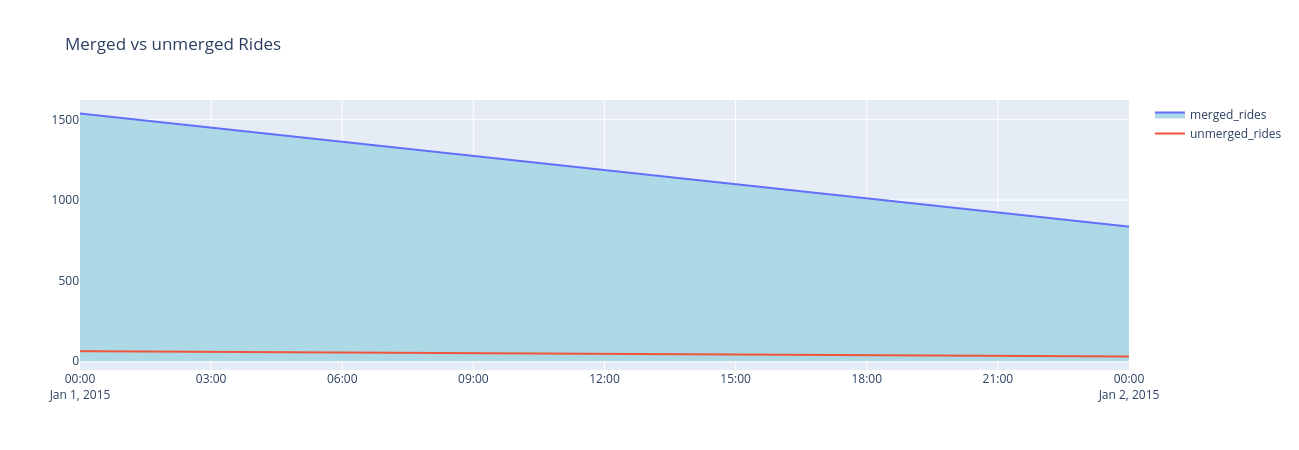

In [52]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=df['merged_rides'], mode='lines',
    fillcolor = 'lightblue', fill = 'tozeroy',
    name = "merged_rides"))
fig.add_trace(go.Scatter(x=df['date'], y=df['unmerged_rides'],mode='lines',
    fillcolor = 'salmon',name = "unmerged_rides"))# fill = 'tozeroy'))

fig.update_layout(
    title = "Merged vs unmerged Rides",
)

fig.show()

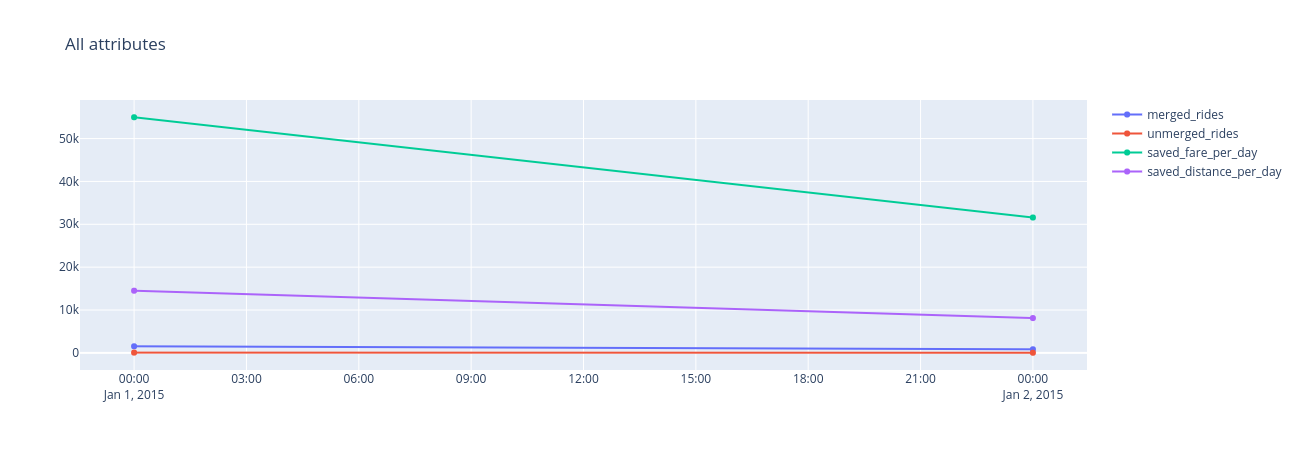

In [53]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=df['merged_rides'], name = "merged_rides"))
fig.add_trace(go.Scatter(x=df['date'], y=df['unmerged_rides'], name = "unmerged_rides"))
fig.add_trace(go.Scatter(x=df['date'], y=df['saved_fare_per_day'], name = "saved_fare_per_day"))
fig.add_trace(go.Scatter(x=df['date'], y=df['saved_distance_per_day'], name = "saved_distance_per_day"))

fig.update_layout(
    title = "All attributes",
)

fig.show()

# Plot merged drop locations

In [30]:
longi, lat = drop_locations[0]
drop_m = folium.Map(location = [float(longi),float(lat)], width = '100%', height = '60%',zoom_start= 11)

marker_cluster = MarkerCluster().add_to(drop_m)

drop_samples = random.sample(drop_locations, 1000)
drop_samples

for point in drop_samples:
    folium.Marker(point).add_to(marker_cluster)

drop_m.save('index-drop.html')
drop_m

# Plot merged pick locations

In [26]:
# Plot pickup locations
longi, lat = pickup_locations[0]
pick_m = folium.Map(location = [float(longi),float(lat)], width = '100%', height = '60%',zoom_start= 11)

marker_cluster = MarkerCluster().add_to(pick_m)

pick_samples = random.sample(drop_locations, 1000)
pick_samples

for point in pick_samples:
    folium.Marker(point).add_to(marker_cluster)

pick_m.save('index-pick.html')
pick_m

IndexError: list index out of range